# ENSO control run

## Running ENSO teleconnection

In [1]:
from teleconnections import Teleconnection

In [2]:
telecname = 'ENSO_2t'

model = 'IFS'
exp = 'control-1950-devcon'
source = 'lra-r100-monthly'

In [3]:
telec = Teleconnection(model=model, exp=exp, source=source, telecname=telecname)

2023-08-31 15:01:43 :: Teleconnection :: WARNING  -> No regridding will be performed
2023-08-31 15:01:43 :: Teleconnection :: WARNING  -> No time aggregation will be performed
2023-08-31 15:01:43 :: Teleconnection :: WARNING  -> No time aggregation will be performed


In [4]:
telec.run()

2023-08-31 15:01:51 :: Reader :: WARNING  -> No variables in the fixes for source lra-r100-monthly
2023-08-31 15:01:51 :: Reader :: WARNING  -> Returning the original variable
2023-08-31 15:01:51 :: Reader :: WARNING  -> Returning the original variable
/work/bb1153/b382289/mambaforge/envs/aqua_common/lib/python3.11/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 10 times more chunks
  return self.array[key]


## Index

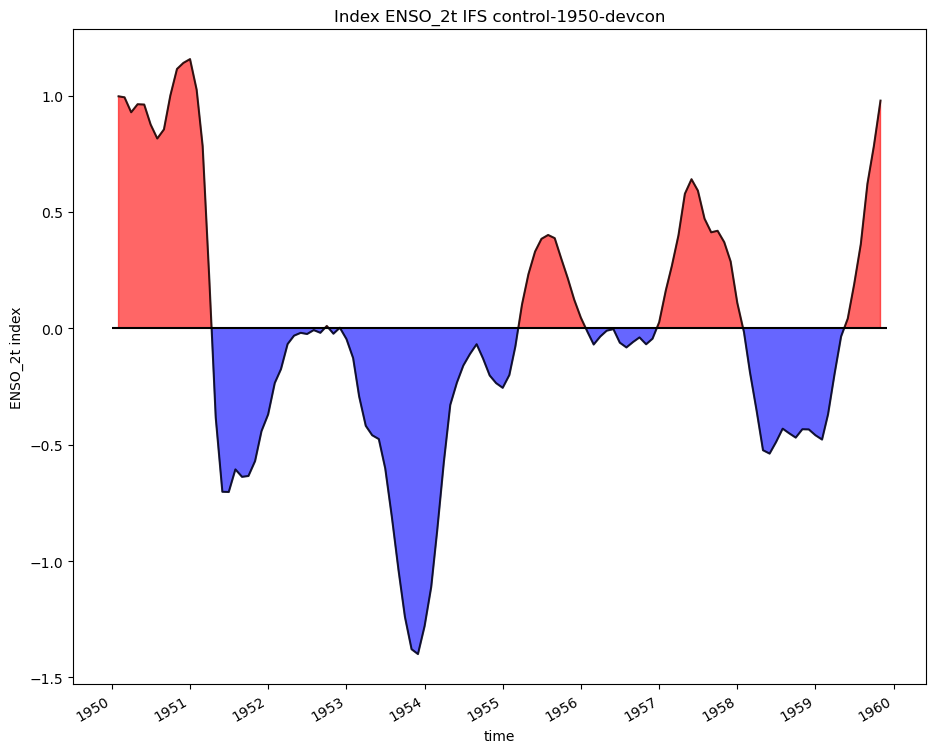

In [5]:
telec.plot_index()

## Regression

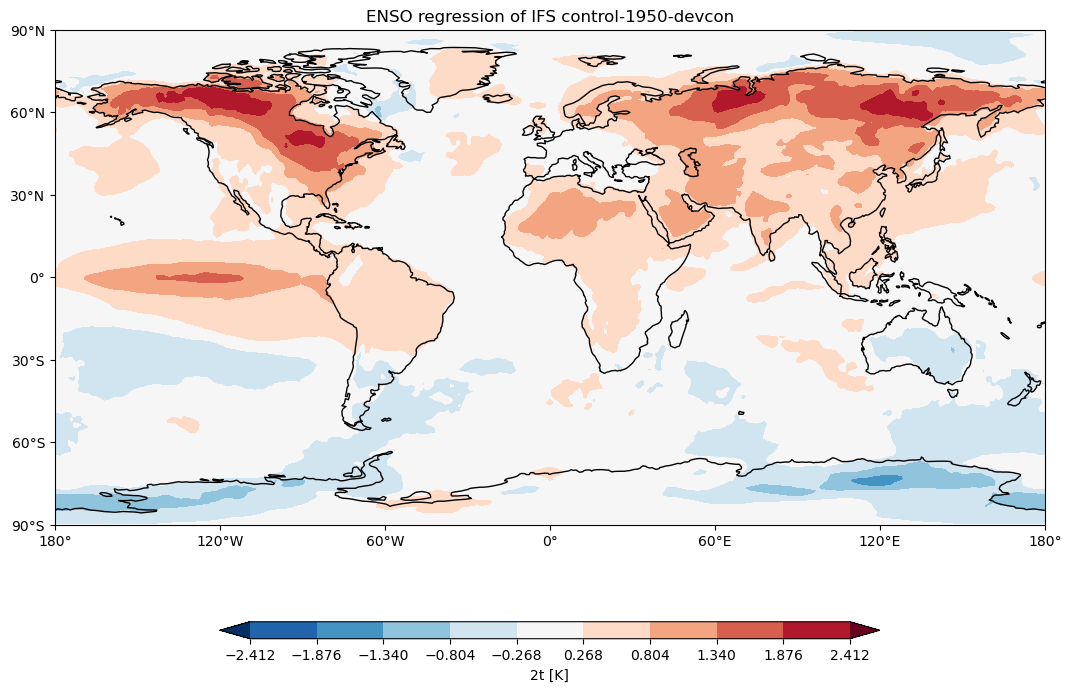

In [6]:
from teleconnections.plots import single_map_plot

single_map_plot(map=telec.regression, model=telec.model, exp=telec.exp, cbar_label='2t [K]', title='ENSO regression of IFS control-1950-devcon')

## Correlation

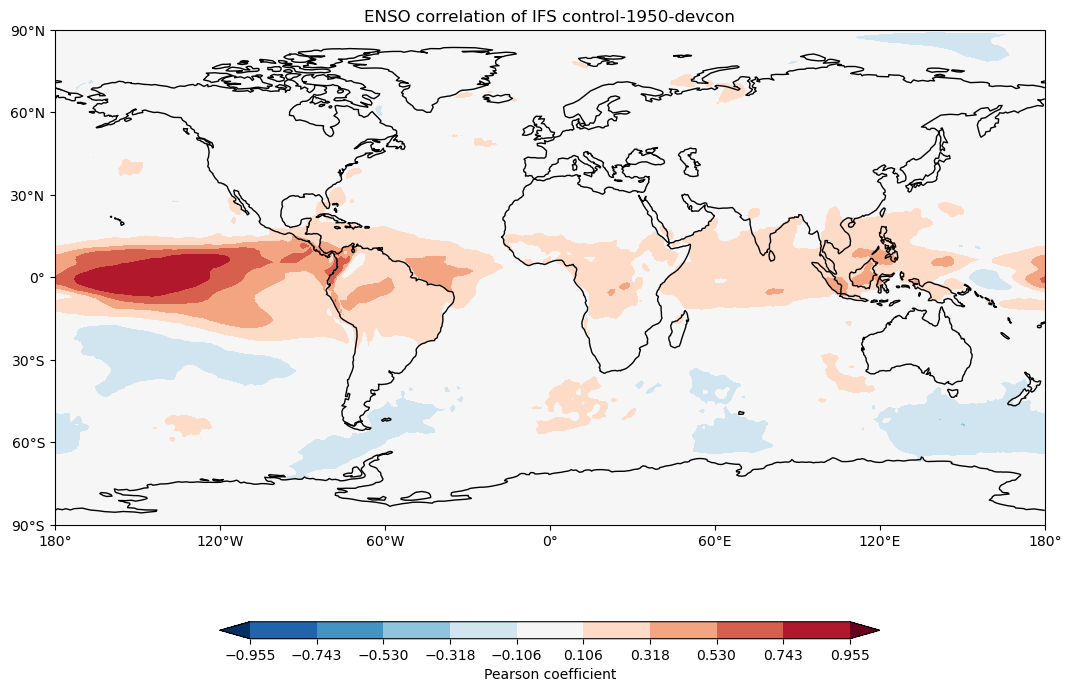

In [7]:
single_map_plot(map=telec.correlation, model=telec.model, exp=telec.exp, cbar_label='Pearson coefficient', title='ENSO correlation of IFS control-1950-devcon')